# Zipf's Law and Analyzing Drake's Lyrics
Zipf's Law is a fascinating pattern found in natural languages where the frequency of a word is inversely proportional to its rank. That means the most used word appears twice as often as the second, three times as often as the third, and so on. This principle holds true in literature, social media, and even song lyrics.

# Task at Hand
In this notebook, we explore whether Drake’s song lyrics follow Zipf’s Law. We:


*   Load and clean the lyrical dataset
*   Tokenize words and remove punctuation

*   Count word frequencies and rank them
*   Visualize word frequency vs. rank on a log-log scale

*   Re-analyze the data after removing stop words
*   Fit a linear regression on log-log data to estimate Zipf’s exponent


# Why It Matters
Understanding Zipf’s Law in song lyrics offers unique insights:


*   Unveils language structure in modern music
*   Highlights common themes or word usage patterns
*   Can improve NLP models for music or chatbots
*   Detects redundancy or stylistic elements in lyrics

This study shows how even artistic content like music often obeys statistical laws of language, revealing order beneath creative expression.

# Importing Required Libraries

In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
#importing csv file
df = pd.read_csv("https://drive.google.com/uc?id=1AK2iU7eWSZg00GlzThUlD0C_wzDolCTf")
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Drake,God’s Plan,Scorpion,2018.0,2018-01-19,and they wishin' and wishin' and wishin' and w...
1,1,Drake,In My Feelings,Scorpion,2018.0,2018-06-29,drake trap trapmoneybenny this shit got me in ...
2,2,Drake,Hotline Bling,Views,2015.0,2015-07-25,you used to call me on my you used to you used...
3,3,Drake,One Dance,Views,2016.0,2016-04-05,kyla baby i like your style drake grips on y...
4,4,Drake,"Hold On, We’re Going Home",Nothing Was the Same,2013.0,2013-08-07,produced by nineteen85 majid jordan noah 40 s...
...,...,...,...,...,...,...,...
461,461,Drake,Real Her (Single Leak),NaN,2011.0,2011-01-01,drake people around you should really have not...
462,462,Drake,Love From a Distance,NaN,NaN,NaN,man i used to look up to you how could you do ...
463,463,Drake,Dementia,NaN,NaN,NaN,what am i doing what am i doing no seriously w...
464,464,Drake,Legendary Shit prod NFF,NaN,NaN,NaN,дима что ты сделал я ебал твой рот нассу тебе...


# Combining all the lyrics


In [ ]:
#combining all the lyrics
all_lyrics = " ".join(df['Lyric'].dropna().astype(str))
all_lyrics

"and they wishin' and wishin' and wishin' and wishin' they wishin' on me yeah   i been movin' calm don't start no trouble with me tryna keep it peaceful is a struggle for me don't pull up at 6 am to cuddle with me you know how i like it when you lovin' on me i don't wanna die for them to miss me yes i see the things that they wishin' on me hope i got some brothers that outlive me they gon' tell the story shit was different with me   god's plan god's plan i hold back sometimes i won't yuh i feel good sometimes i don't ayy don't i finessed down weston road ayy 'nessed might go down a god yeah wait i go hard on southside g yeah wait i make sure that northside eat  post and still bad things it's a lot of bad things that they wishin' and wishin' and wishin' and wishin' they wishin' on me bad things it's a lot of bad things that they wishin' and wishin' and wishin' and wishin' they wishin' on me yeah ayy ayy   she say do you love me i tell her only partly i only love my bed and my mama i'm s

In [ ]:
#removing all punctuation
all_lyrics = all_lyrics.lower()
all_lyrics = ''.join([char if char.isalpha() or char.isspace() else '' for char in all_lyrics])
all_lyrics

'and they wishin and wishin and wishin and wishin they wishin on me yeah   i been movin calm dont start no trouble with me tryna keep it peaceful is a struggle for me dont pull up at  am to cuddle with me you know how i like it when you lovin on me i dont wanna die for them to miss me yes i see the things that they wishin on me hope i got some brothers that outlive me they gon tell the story shit was different with me   gods plan gods plan i hold back sometimes i wont yuh i feel good sometimes i dont ayy dont i finessed down weston road ayy nessed might go down a god yeah wait i go hard on southside g yeah wait i make sure that northside eat  post and still bad things its a lot of bad things that they wishin and wishin and wishin and wishin they wishin on me bad things its a lot of bad things that they wishin and wishin and wishin and wishin they wishin on me yeah ayy ayy   she say do you love me i tell her only partly i only love my bed and my mama im sorry fifty dub i even got it tat

# Tokenising Words

In [ ]:
#tokenizing the lyrics
tokens = all_lyrics.split()

# Word Frequency and Ranking


In [ ]:
#making dataframe for words, frequency and ranks
freq_series = pd.Series(tokens).value_counts().reset_index()
freq_series.columns = ['word', 'frequency']
freq_series['rank'] = np.arange(1, len(freq_series) + 1)
freq_series

,word,frequency,rank
0,i,8957,1
1,you,7847,2
2,the,6791,3
3,and,4532,4
4,to,4484,5
...,...,...,...
11214,badass,1,11215
11215,ohwe,1,11216
11216,ck,1,11217
11217,dicking,1,11218


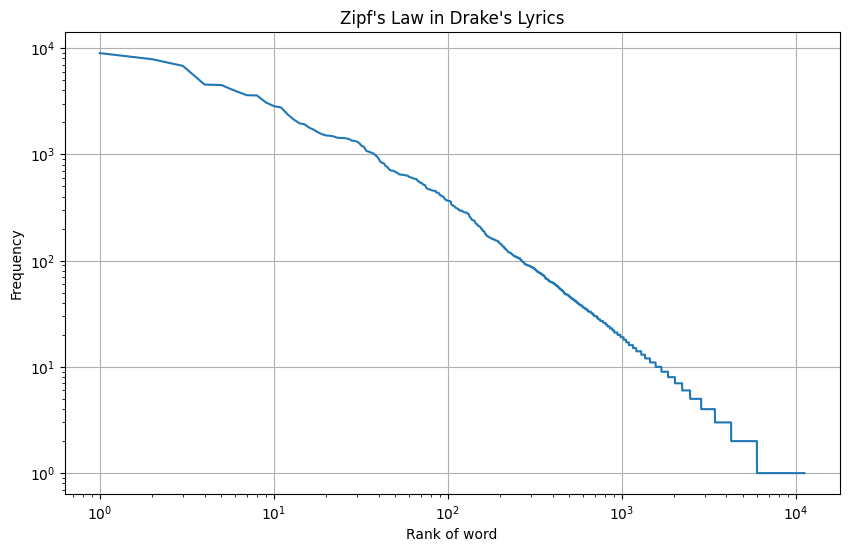

In [ ]:
#counts word frequencies, ranks them, and visualizes the relationship between rank and frequency using a log-log plot to demonstrate Zipf's Law in Drake's lyrics.
freq_series = pd.Series(tokens).value_counts().reset_index()
freq_series.columns = ['word', 'frequency']
freq_series['rank'] = np.arange(1, len(freq_series) + 1)
ranks = freq_series['rank']
frequencies = freq_series['frequency']

plt.figure(figsize=(10,6))
plt.loglog(ranks, frequencies)
plt.xlabel("Rank of word")
plt.ylabel("Frequency")
plt.title("Zipf's Law in Drake's Lyrics")
plt.grid(True)
plt.show()

# Initial Zipf’s Law Log-Log Plot

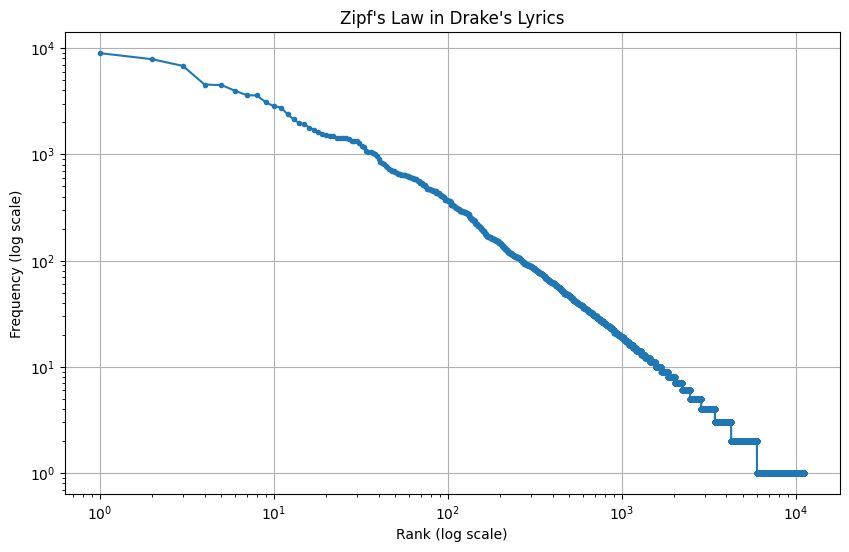

In [ ]:
#log vs log plot of frequency and rank
plt.figure(figsize=(10, 6))
plt.loglog(freq_series['rank'], freq_series['frequency'], marker='.')
plt.title("Zipf's Law in Drake's Lyrics")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

# Top 20 Words Visualization

<ipython-input-10-497ec9ec40d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_words, palette="magma")


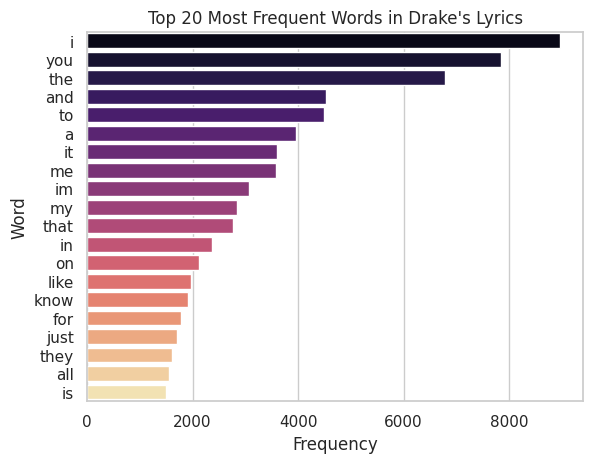

In [ ]:
#plotting most frequent words
top_words = freq_series.head(20)
sns.set(style="whitegrid")
sns.barplot(x='frequency', y='word', data=top_words, palette="magma")
plt.title("Top 20 Most Frequent Words in Drake's Lyrics")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Removing Stop Words

In [ ]:
#removing stop words
all_lyrics = all_lyrics.lower()
all_lyrics = ''.join([char if char.isalpha() or char.isspace() else '' for char in all_lyrics])
all_lyrics

stop_words = set([
    'the', 'and', 'is', 'in', 'it', 'of', 'to', 'a', 'i', 'you', 'on', 'for',
    'with', 'at', 'this', 'that', 'was', 'but', 'be', 'by', 'are', 'from', 'so',
    'an', 'if', 'or', 'as', 'me', 'my', 'we', 'do', 'no', 'not', 'your'
])
tokens = [word for word in tokens if word not in stop_words]
tokens = [word for word in tokens if len(word) > 2]

tokens

['they',
 'wishin',
 'wishin',
 'wishin',
 'wishin',
 'they',
 'wishin',
 'yeah',
 'been',
 'movin',
 'calm',
 'dont',
 'start',
 'trouble',
 'tryna',
 'keep',
 'peaceful',
 'struggle',
 'dont',
 'pull',
 'cuddle',
 'know',
 'how',
 'like',
 'when',
 'lovin',
 'dont',
 'wanna',
 'die',
 'them',
 'miss',
 'yes',
 'see',
 'things',
 'they',
 'wishin',
 'hope',
 'got',
 'some',
 'brothers',
 'outlive',
 'they',
 'gon',
 'tell',
 'story',
 'shit',
 'different',
 'gods',
 'plan',
 'gods',
 'plan',
 'hold',
 'back',
 'sometimes',
 'wont',
 'yuh',
 'feel',
 'good',
 'sometimes',
 'dont',
 'ayy',
 'dont',
 'finessed',
 'down',
 'weston',
 'road',
 'ayy',
 'nessed',
 'might',
 'down',
 'god',
 'yeah',
 'wait',
 'hard',
 'southside',
 'yeah',
 'wait',
 'make',
 'sure',
 'northside',
 'eat',
 'post',
 'still',
 'bad',
 'things',
 'its',
 'lot',
 'bad',
 'things',
 'they',
 'wishin',
 'wishin',
 'wishin',
 'wishin',
 'they',
 'wishin',
 'bad',
 'things',
 'its',
 'lot',
 'bad',
 'things',
 'they',

In [ ]:
#making dataframe for word frequency after removing stop words
freq_series = pd.Series(tokens).value_counts().reset_index()
freq_series.columns = ['word', 'frequency']

freq_series['rank'] = np.arange(1, len(freq_series) + 1)
print(freq_series.head(10))

   word  frequency  rank
0  like       1962     1
1  know       1915     2
2  just       1701     3
3  they       1606     4
4   all       1543     5
5  yeah       1476     6
6  dont       1425     7
7   got       1339     8
8   its       1321     9
9   get       1199    10


# Re-plotting After Cleaning

<ipython-input-16-b5cd9f351470>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_words, palette="crest")


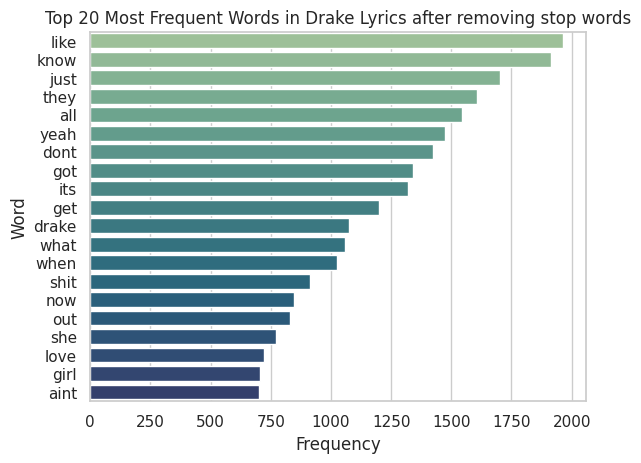

In [ ]:
#plotting most frequent words after removing stop words
sns.set(style="whitegrid")
top_words = freq_series.head(20)

sns.barplot(x='frequency', y='word', data=top_words, palette="crest")
plt.title("Top 20 Most Frequent Words in Drake Lyrics after removing stop words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


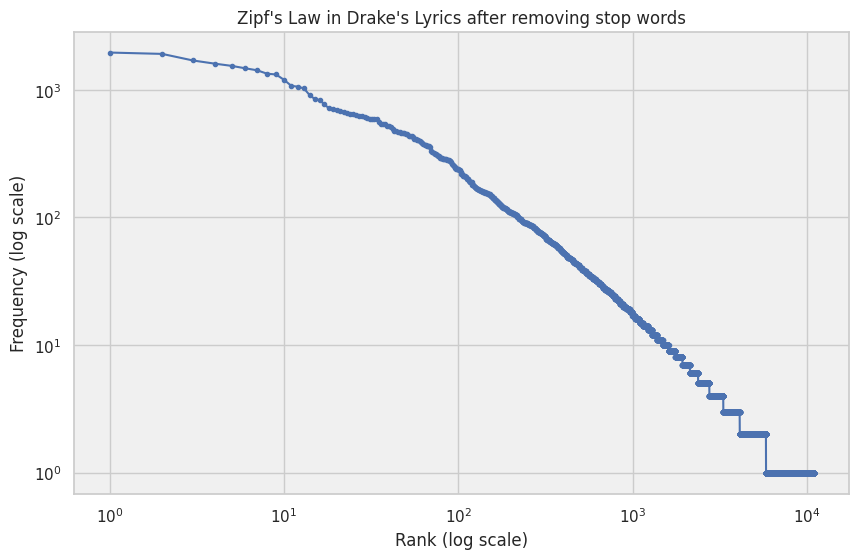

In [ ]:
#log vs log plot after removing stop words
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#f0f0f0')  # Axes background
plt.gcf().set_facecolor('#ffffff')  # Figure background

plt.loglog(freq_series['rank'], freq_series['frequency'], marker='.')
plt.title("Zipf's Law in Drake's Lyrics after removing stop words")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()


# Linear Regression on Log Data

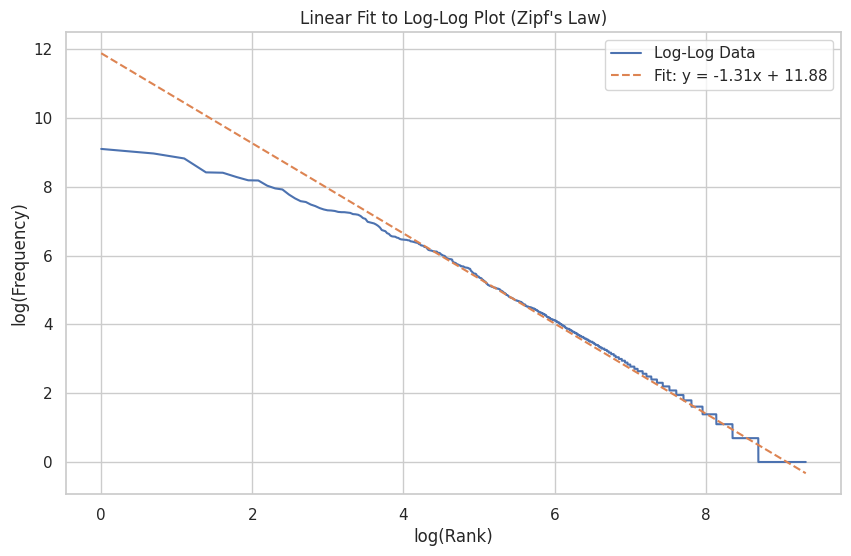

In [ ]:
log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)

# Linear regression (Zipf's exponent should be close to -1)
slope, intercept = np.polyfit(log_ranks, log_freqs, 1)

plt.figure(figsize=(10, 6))
plt.plot(log_ranks, log_freqs, label="Log-Log Data")
plt.plot(log_ranks, slope*log_ranks + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", linestyle='--')
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.title("Linear Fit to Log-Log Plot (Zipf's Law)")
plt.legend()
plt.grid(True)
plt.show()
